## Boston Housing Data - Stacking Ensemble Analysis

#### In this exercise, I have used stacking ensemble method to predict the house rates in Boston

In [1]:
## Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge, LinearRegression,SGDRegressor,LassoCV,ElasticNet,RidgeCV
from sklearn.tree import DecisionTreeRegressor
import sklearn.cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import *
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import ensemble

In [2]:
## Set directory
%cd /Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/Day 3/Assignment/Data/Boston Housing

/Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/Day 3/Assignment/Data/Boston Housing


### Import data

In [3]:
## Get Boston Data
boston = load_boston()
print boston.data.shape
print boston.feature_names


(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
## Data Scaling
data_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

data = data_scaler.fit_transform(boston.data)
target = target_scaler.fit_transform(boston.target)

/Users/Deepthi/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Deepthi/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### Split the data into test and train sets

In [5]:
## Split the data into test and train datasets
X_train1, X_test1, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=33)

### Select 5 best features using f_regression

In [6]:
fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train1,y_train)
X_train = X_new.copy()
df = pd.DataFrame(zip(fs.get_support(),range(0,13)))
print 'Selected features:'
print list(df[df[0]==1][1])

X_test = X_test1[:,[2, 5, 9, 10, 12]]

Selected features:
[2, 5, 9, 10, 12]


### Try several combination of Base classifiers and Meta classifiers

In this section I have tried several combinations of Base and Meta classifiers. Initial few models are using very simple learning models. I have gradually increased the complexity of the models 

##### Using 2 models in Stack0:
In my experiment, a combination of SVR and LinearRegression for base models and GradientBoostingRegressor for meta model gave the best results. (Score = 0.86 and the least MSE of 0.007 among all the other models)

##### Using 3 models in stack0:
In my experiment, a combination of GradientBoostingRegressor, RandomForestRegressor and Ridge in stack0 and Linear Regression in stack1 provided good results. (Score = 0.84, and MSE = 0.008)

#### Model 1

Stack0 models (Base model):
    1. Linear Regression
    2. Ridge Regression

Stack1 models (Meta model):
    1. Linear Regression
    

#### Observation:
The Meta model significantly reduces the MSE.

stack0_score1: 0.743624788494
stack0_mse1: 0.0127027301817
stack0_score2: 0.74286612344
stack0_mse2: 0.0127403200775
stack1_score: 0.729106234783
stack1_mse: 0.0134220870545


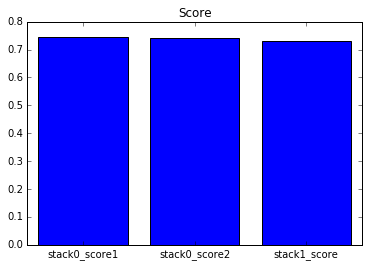

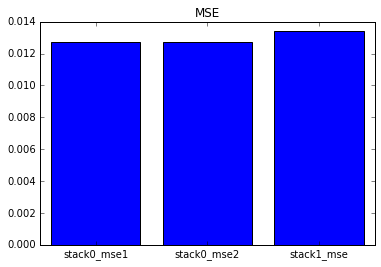

In [7]:
## Split the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=4)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_train, y_train, test_size=0.5, random_state=4)

# Fit base model 1
clf1 = LinearRegression()
clf1.fit(X_train_base,y_train_base)
pred1 = clf1.predict(X_test_base)

# Fit base model 2
clf2 = RidgeCV()
clf2.fit(X_train_base,y_train_base)
pred2 = clf2.predict(X_test_base)

# Fit Meta model
clf3 = LinearRegression()
clf3.fit(pd.DataFrame(zip(pred1,pred2)),y_test_base)
pred3 = clf3.predict(pd.DataFrame(zip(pred1,pred2)))

# Test the model
pred1a = clf1.predict(X_test)
stack0_score1 = clf1.score(X_test,y_test)
stack0_mse1 = mean_squared_error(y_test, pred1a)
print 'stack0_score1:',stack0_score1
print 'stack0_mse1:',stack0_mse1

pred2a = clf2.predict(X_test)
stack0_score2 = clf2.score(X_test,y_test)
stack0_mse2 = mean_squared_error(y_test, pred2a)
print 'stack0_score2:', stack0_score2
print 'stack0_mse2:',stack0_mse2

pred3a = clf3.predict(pd.DataFrame(zip(pred1a,pred2a)))
stack1_score = clf3.score(pd.DataFrame(zip(pred1a,pred2a)),y_test)
stack1_mse = mean_squared_error(y_test, pred3a)
print 'stack1_score:' , stack1_score
print 'stack1_mse:',stack1_mse

# Plot scores
x = ['stack0_score1','stack0_score2','stack1_score']
y = list([stack0_score1,stack0_score2,stack1_score])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('Score')
plt.show()

#Plot mean squared error
x = ['stack0_mse1','stack0_mse2','stack1_mse']
y = list([stack0_mse1,stack0_mse2,stack1_mse])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('MSE')
plt.show()

### Model 2

Stack0 models:
    1. Linear Regression
    2. Ridge Regression

Stack1 models:
    1. Ridge Regression
    
#### Observation:
The Meta model - Ridge regression has very similar performance as that of LinearRegression model used in the previous iteration.

stack0_score1: 0.743624788494
stack0_mse1: 0.0127027301817
stack0_score2: 0.74286612344
stack0_mse2: 0.0127403200775
stack1_score: 0.736251115763
stack1_mse: 0.0130680766386


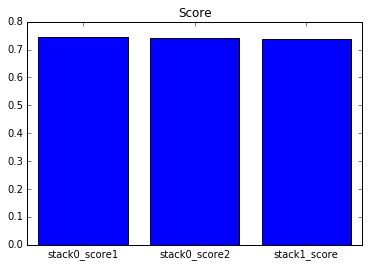

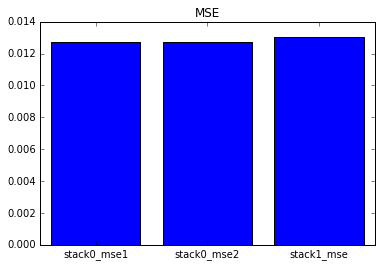

In [8]:
## Split the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=4)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_train, y_train, test_size=0.5, random_state=4)

# Fit base model 1
clf1 = LinearRegression()
clf1.fit(X_train_base,y_train_base)
pred1 = clf1.predict(X_test_base)

# Fit base model 2
clf2 = RidgeCV()
clf2.fit(X_train_base,y_train_base)
pred2 = clf2.predict(X_test_base)

# Fit Meta model
clf3 = RidgeCV()
clf3.fit(pd.DataFrame(zip(pred1,pred2)),y_test_base)
pred3 = clf3.predict(pd.DataFrame(zip(pred1,pred2)))

# Test the model
pred1a = clf1.predict(X_test)
stack0_score1 = clf1.score(X_test,y_test)
stack0_mse1 = mean_squared_error(y_test, pred1a)
print 'stack0_score1:',stack0_score1
print 'stack0_mse1:',stack0_mse1

pred2a = clf2.predict(X_test)
stack0_score2 = clf2.score(X_test,y_test)
stack0_mse2 = mean_squared_error(y_test, pred2a)
print 'stack0_score2:', stack0_score2
print 'stack0_mse2:',stack0_mse2

pred3a = clf3.predict(pd.DataFrame(zip(pred1a,pred2a)))
stack1_score = clf3.score(pd.DataFrame(zip(pred1a,pred2a)),y_test)
stack1_mse = mean_squared_error(y_test, pred3a)
print 'stack1_score:' , stack1_score
print 'stack1_mse:',stack1_mse

# Plot scores
x = ['stack0_score1','stack0_score2','stack1_score']
y = list([stack0_score1,stack0_score2,stack1_score])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('Score')
plt.show()

#Plot mean squared error
x = ['stack0_mse1','stack0_mse2','stack1_mse']
y = list([stack0_mse1,stack0_mse2,stack1_mse])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('MSE')
plt.show()

### Model 3

Stack0 models:
    1. Linear Regression
    2. ElasticNet Regression

Stack1 models:
    1. Linear Regression

#### Observation:
Using ElasticNet regression in the base model significantly reduced the rsquare.

stack0_score1: 0.743624788494
stack0_mse1: 0.0127027301817
stack0_score2: -0.0258192870131
stack0_mse2: 0.050826698656
stack1_score: 0.736932791689
stack1_mse: 0.0130343013554


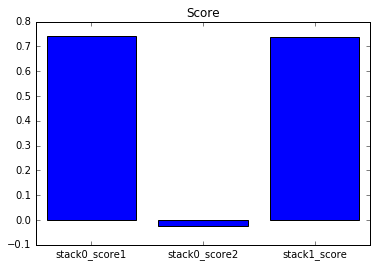

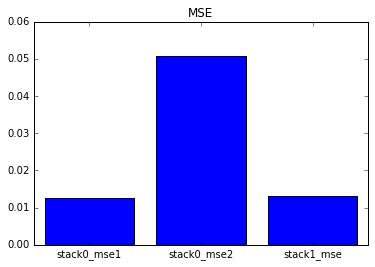

In [9]:
## Split the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=4)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_train, y_train, test_size=0.5, random_state=4)

# Fit base model 1
clf1 = LinearRegression()
clf1.fit(X_train_base,y_train_base)
pred1 = clf1.predict(X_test_base)

# Fit base model 2
clf2 = ElasticNet()
clf2.fit(X_train_base,y_train_base)
pred2 = clf2.predict(X_test_base)

# Fit Meta model
clf3 = LinearRegression()
clf3.fit(pd.DataFrame(zip(pred1,pred2)),y_test_base)
pred3 = clf3.predict(pd.DataFrame(zip(pred1,pred2)))

# Test the model
pred1a = clf1.predict(X_test)
stack0_score1 = clf1.score(X_test,y_test)
stack0_mse1 = mean_squared_error(y_test, pred1a)
print 'stack0_score1:',stack0_score1
print 'stack0_mse1:',stack0_mse1

pred2a = clf2.predict(X_test)
stack0_score2 = clf2.score(X_test,y_test)
stack0_mse2 = mean_squared_error(y_test, pred2a)
print 'stack0_score2:', stack0_score2
print 'stack0_mse2:',stack0_mse2

pred3a = clf3.predict(pd.DataFrame(zip(pred1a,pred2a)))
stack1_score = clf3.score(pd.DataFrame(zip(pred1a,pred2a)),y_test)
stack1_mse = mean_squared_error(y_test, pred3a)
print 'stack1_score:' , stack1_score
print 'stack1_mse:',stack1_mse

# Plot scores
x = ['stack0_score1','stack0_score2','stack1_score']
y = list([stack0_score1,stack0_score2,stack1_score])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('Score')
plt.show()

#Plot mean squared error
x = ['stack0_mse1','stack0_mse2','stack1_mse']
y = list([stack0_mse1,stack0_mse2,stack1_mse])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('MSE')
plt.show()

### Model 4

Stack0 models:
    1. Linear Regression
    2. DecisionTreeRegressor (Max depth = 3)

Stack1 models:
    1. Linear Regression
    
#### Observation:
This is the best model that I was able to obtain. DecisionTreeRegressor with Max_depth = 3 in combination with Linear Regression has the best fit with a score of 0.74 and one of the lowest MSE.

stack0_score1: 0.743624788494
stack0_mse1: 0.0127027301817
stack0_score2: 0.632475738
stack0_mse2: 0.0182098788256
stack1_score: 0.773967220914
stack1_mse: 0.0111993409506


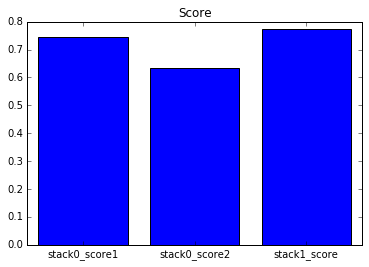

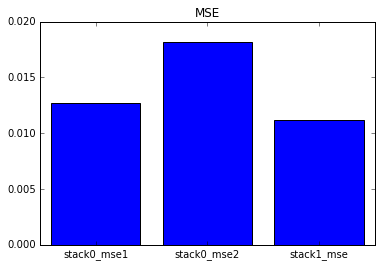

In [10]:
## Split the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=4)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_train, y_train, test_size=0.5, random_state=4)

# Fit base model 1
clf1 = LinearRegression()
clf1.fit(X_train_base,y_train_base)
pred1 = clf1.predict(X_test_base)

# Fit base model 2
clf2 = DecisionTreeRegressor(max_depth=3)
clf2.fit(X_train_base,y_train_base)
pred2 = clf2.predict(X_test_base)

# Fit Meta model
clf3 = LinearRegression()
clf3.fit(pd.DataFrame(zip(pred1,pred2)),y_test_base)
pred3 = clf3.predict(pd.DataFrame(zip(pred1,pred2)))

# Test the model
pred1a = clf1.predict(X_test)
stack0_score1 = clf1.score(X_test,y_test)
stack0_mse1 = mean_squared_error(y_test, pred1a)
print 'stack0_score1:',stack0_score1
print 'stack0_mse1:',stack0_mse1

pred2a = clf2.predict(X_test)
stack0_score2 = clf2.score(X_test,y_test)
stack0_mse2 = mean_squared_error(y_test, pred2a)
print 'stack0_score2:', stack0_score2
print 'stack0_mse2:',stack0_mse2

pred3a = clf3.predict(pd.DataFrame(zip(pred1a,pred2a)))
stack1_score = clf3.score(pd.DataFrame(zip(pred1a,pred2a)),y_test)
stack1_mse = mean_squared_error(y_test, pred3a)
print 'stack1_score:' , stack1_score
print 'stack1_mse:',stack1_mse

# Plot scores
x = ['stack0_score1','stack0_score2','stack1_score']
y = list([stack0_score1,stack0_score2,stack1_score])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('Score')
plt.show()

#Plot mean squared error
x = ['stack0_mse1','stack0_mse2','stack1_mse']
y = list([stack0_mse1,stack0_mse2,stack1_mse])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('MSE')
plt.show()

### Model 5

Stack0 models:
    1. DecisionTreeRegressor Regression - max_depth = 2
    2. DecisionTreeRegressor Regression - max_depth = 3

Stack1 models:
    1. Linear Regression
    
#### Observation:
Using DecisionTreeRegressors of different max_depths as base regressor didn't have a huge impact on the model fit. 

stack0_score1: 0.635791879406
stack0_mse1: 0.0180455725759
stack0_score2: 0.632475738
stack0_mse2: 0.0182098788256
stack1_score: 0.628166299997
stack1_mse: 0.0184234003586


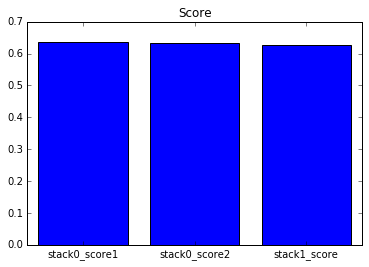

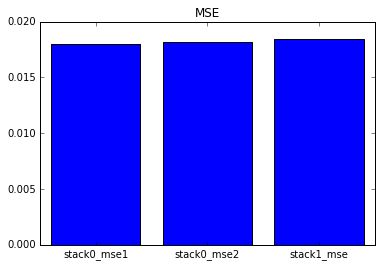

In [11]:
## Split the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=4)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_train, y_train, test_size=0.5, random_state=4)

# Fit base model 1
clf1 = DecisionTreeRegressor(max_depth = 2)
clf1.fit(X_train_base,y_train_base)
pred1 = clf1.predict(X_test_base)

# Fit base model 2
clf2 = DecisionTreeRegressor(max_depth = 3)
clf2.fit(X_train_base,y_train_base)
pred2 = clf2.predict(X_test_base)

# Fit Meta model
clf3 = LinearRegression()
clf3.fit(pd.DataFrame(zip(pred1,pred2)),y_test_base)
pred3 = clf3.predict(pd.DataFrame(zip(pred1,pred2)))

# Test the model
pred1a = clf1.predict(X_test)
stack0_score1 = clf1.score(X_test,y_test)
stack0_mse1 = mean_squared_error(y_test, pred1a)
print 'stack0_score1:',stack0_score1
print 'stack0_mse1:',stack0_mse1

pred2a = clf2.predict(X_test)
stack0_score2 = clf2.score(X_test,y_test)
stack0_mse2 = mean_squared_error(y_test, pred2a)
print 'stack0_score2:', stack0_score2
print 'stack0_mse2:',stack0_mse2

pred3a = clf3.predict(pd.DataFrame(zip(pred1a,pred2a)))
stack1_score = clf3.score(pd.DataFrame(zip(pred1a,pred2a)),y_test)
stack1_mse = mean_squared_error(y_test, pred3a)
print 'stack1_score:' , stack1_score
print 'stack1_mse:',stack1_mse

# Plot scores
x = ['stack0_score1','stack0_score2','stack1_score']
y = list([stack0_score1,stack0_score2,stack1_score])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('Score')
plt.show()

#Plot mean squared error
x = ['stack0_mse1','stack0_mse2','stack1_mse']
y = list([stack0_mse1,stack0_mse2,stack1_mse])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('MSE')
plt.show()

### Model 5

Stack0 models:
    1. SVR
    2. LinearRegression

Stack1 models:
    1. GradientBoostingRegressor
    
#### Observation:
Using Boosted regressor in the stack 1 greatly improved the performance

stack0_score1: 0.823912865044
stack0_mse1: 0.00872466316333
stack0_score2: 0.743624788494
stack0_mse2: 0.0127027301817
stack1_score: 0.857151713024
stack1_mse: 0.00707776401513


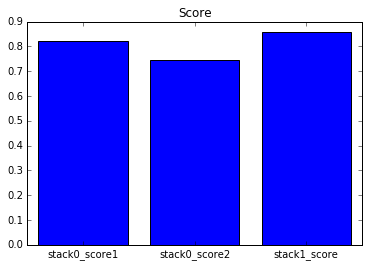

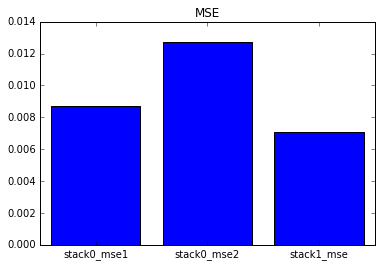

In [12]:
## Split the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=4)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_train, y_train, test_size=0.5, random_state=4)

# Fit base model 1
clf1 = SVR(kernel='poly', C=1e3, degree=2)
clf1.fit(X_train_base,y_train_base)
pred1 = clf1.predict(X_test_base)

# Fit base model 2
clf2 = LinearRegression()
clf2.fit(X_train_base,y_train_base)
pred2 = clf2.predict(X_test_base)

# Fit Meta model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1, 'learning_rate': 0.01, 'loss': 'ls'}
clf3 = ensemble.GradientBoostingRegressor(**params)
clf3.fit(pd.DataFrame(zip(pred1,pred2)),y_test_base)
pred3 = clf3.predict(pd.DataFrame(zip(pred1,pred2)))

# Test the model
pred1a = clf1.predict(X_test)
stack0_score1 = clf1.score(X_test,y_test)
stack0_mse1 = mean_squared_error(y_test, pred1a)
print 'stack0_score1:',stack0_score1
print 'stack0_mse1:',stack0_mse1

pred2a = clf2.predict(X_test)
stack0_score2 = clf2.score(X_test,y_test)
stack0_mse2 = mean_squared_error(y_test, pred2a)
print 'stack0_score2:', stack0_score2
print 'stack0_mse2:',stack0_mse2

pred3a = clf3.predict(pd.DataFrame(zip(pred1a,pred2a)))
stack1_score = clf3.score(pd.DataFrame(zip(pred1a,pred2a)),y_test)
stack1_mse = mean_squared_error(y_test, pred3a)
print 'stack1_score:' , stack1_score
print 'stack1_mse:',stack1_mse

# Plot scores
x = ['stack0_score1','stack0_score2','stack1_score']
y = list([stack0_score1,stack0_score2,stack1_score])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('Score')
plt.show()

#Plot mean squared error
x = ['stack0_mse1','stack0_mse2','stack1_mse']
y = list([stack0_mse1,stack0_mse2,stack1_mse])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('MSE')
plt.show()

### Model 7

Stack0 models:
    1. GradientBoostingRegressor
    2. RandomForestRegressor
    3. Ridge

Stack1 models:
    1. Linear Regression
    
#### Observation:
Using 3 base models improved the performance drastically when compared to just 2 base models

stack0_score1: 0.850032291232
stack0_mse1: 0.00743051299406
stack0_score2: 0.82953411278
stack0_mse2: 0.00844614484301
stack0_score3: 0.74286612344
stack0_mse3: 0.0127403200775
stack1_score: 0.851652105493
stack1_mse: 0.00735025537718


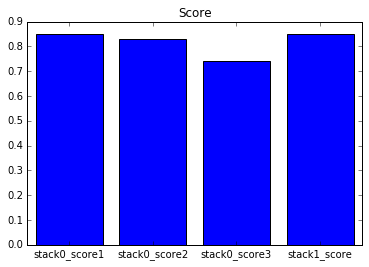

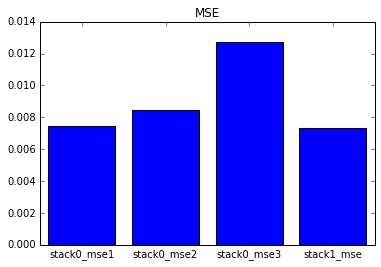

In [13]:
## Split the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=4)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_train, y_train, test_size=0.5, random_state=4)

# Fit base model 1
clf1 = GradientBoostingRegressor()
clf1.fit(X_train_base,y_train_base)
pred1 = clf1.predict(X_test_base)

# Fit base model 2
clf2 = RandomForestRegressor()
clf2.fit(X_train_base,y_train_base)
pred2 = clf2.predict(X_test_base)

# Fit base model 3
clf3 = RidgeCV()
clf3.fit(X_train_base,y_train_base)
pred3 = clf3.predict(X_test_base)

# Fit Meta model
clf4 = LinearRegression()
clf4.fit(pd.DataFrame(zip(pred1,pred2,pred3)),y_test_base)
pred4 = clf4.predict(pd.DataFrame(zip(pred1,pred2,pred3)))

# Test the model
pred1a = clf1.predict(X_test)
stack0_score1 = clf1.score(X_test,y_test)
stack0_mse1 = mean_squared_error(y_test, pred1a)
print 'stack0_score1:',stack0_score1
print 'stack0_mse1:',stack0_mse1

pred2a = clf2.predict(X_test)
stack0_score2 = clf2.score(X_test,y_test)
stack0_mse2 = mean_squared_error(y_test, pred2a)
print 'stack0_score2:', stack0_score2
print 'stack0_mse2:',stack0_mse2

pred3a = clf3.predict(X_test)
stack0_score3 = clf3.score(X_test,y_test)
stack0_mse3 = mean_squared_error(y_test, pred3a)
print 'stack0_score3:', stack0_score3
print 'stack0_mse3:',stack0_mse3

pred4a = clf4.predict(pd.DataFrame(zip(pred1a,pred2a,pred3a)))
stack1_score = clf4.score(pd.DataFrame(zip(pred1a,pred2a,pred3a)),y_test)
stack1_mse = mean_squared_error(y_test, pred4a)
print 'stack1_score:' , stack1_score
print 'stack1_mse:',stack1_mse

# Plot scores
x = ['stack0_score1','stack0_score2','stack0_score3','stack1_score']
y = list([stack0_score1,stack0_score2,stack0_score3,stack1_score])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('Score')
plt.show()

#Plot mean squared error
x = ['stack0_mse1','stack0_mse2','stack0_mse3','stack1_mse']
y = list([stack0_mse1,stack0_mse2,stack0_mse3,stack1_mse])
top= zip(x,y)
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels)
plt.title('MSE')
plt.show()